# Numpy

In [1]:
import numpy as np

In [3]:
lovely_simple_array = np.arange(0,10)
lovely_simple_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
np.sum(lovely_simple_array), np.average(lovely_simple_array), np.median(lovely_simple_array)

(45, 4.5, 4.5, 0)

In [14]:
two_row_array = np.reshape(lovely_simple_array, (2,5) )
two_row_array[0] = two_row_array[0] *2
two_row_array

array([[ 0,  8, 16, 24, 32],
       [ 5,  6,  7,  8,  9]])

In [8]:
lovely_simple_array * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [6]:
lovely_simple_array != 0

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

***
- Product of two arrays with **the same** shape

In [9]:
lovely_simple_array, np.arange(10,20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

In [7]:
lovely_simple_array * np.arange(10,20)

array([  0,  11,  24,  39,  56,  75,  96, 119, 144, 171])

- Product of two arrays with **not exactly the same** shape

In [18]:
array_one = np.reshape( np.arange(0,10), (2,5) )
array_two = np.arange(0,5)

print('First array is \n',array_one)
print('Second array is \n',array_two)

print('The production of the two is \n', array_one * array_two)
print('\n That is how Python broadcasted array_two to array_one')

First array is 
 [[0 1 2 3 4]
 [5 6 7 8 9]]
Second array is 
 [0 1 2 3 4]
The production of the two is 
 [[ 0  1  4  9 16]
 [ 0  6 14 24 36]]

 That is how Python broadcasted array_two to array_one


***
- Matrix operations:

In [48]:
array_one[:,0]*=2
array_one
#  np.transpose(array_one)

array([[ 0,  1,  2,  3,  4],
       [20,  6,  7,  8,  9]])

In [10]:
np.concatenate( (array_two,array_two*-1) )

array([ 0,  1,  2,  3,  4,  0, -1, -2, -3, -4])

In [11]:
np.stack( (array_two,array_two) )

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [22]:
phi = np.arange(0,5)
psi = np.arange(5,10)

np.dot(phi,psi)

80

In [24]:
phi
np.exp(phi)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [25]:
np.sum( np.log(phi) )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

***
### Masking

In [36]:
mask = np.array([False, True, True, True, True])
phi[ mask ]

array([1, 2, 3, 4])

In [39]:
positive_mask = phi > 0
positive_mask

array([False,  True,  True,  True,  True])

In [40]:
phi[positive_mask]

array([1, 2, 3, 4])

In [41]:
print( np.log(phi[positive_mask]),'\n the sum is: ' ,np.sum( np.log(phi[positive_mask]) ) )

[0.         0.69314718 1.09861229 1.38629436] 
 the sum is:  3.1780538303479453


***
### Save and load nparrays

In [19]:
np.save('log_positive_phi.npy',np.log(phi[positive_mask]))

In [20]:
loaded_nparray = np.load('log_positive_phi.npy')
loaded_nparray

array([0.        , 0.69314718, 1.09861229, 1.38629436])

***
- **Example**

    Get familiar with very good day of Leicester City!
    
    <img src="Figures/man_city_vs_leicester_city.png" alt="Drawing" style="width: 500px;" align = "left"/>
    


***
After we have found out which day is a **good day**, we compute it for *Shahrdary Bam* vs. *Vouchan Kordestan* team!
    
The data of two teams are recorded in 'women_football.npy' array.
Check the illustartion bellow to find the data manual:
    
<img src="figures/women_football_data_readme.png" alt="Drawing" style="width: 500px;" align = "center"/>

In [50]:
results = np.load('women_football.npy')
results.shape

(3, 2, 100)

***
Number of Goals

In [51]:
shahrdari_bam_goals = np.sum( results[0][0] )
vouchan_kordestan_goals = np.sum( results[0][1] )

shahrdari_bam_goals, vouchan_kordestan_goals

(430.0, 422.0)

In [53]:
np.sum(results[0], axis = 1)

array([430., 422.])

In [60]:
match_goals = np.transpose(results[0])
match_goals[0]

array([5., 0.])

***
Ball possession

In [25]:
np.average(results[1], axis = 1)

array([46.03, 53.97])

***
Very good days:

    if the shahrdari win while it has less possession, has a good luck!

    How many times it had the very good day!

In [63]:
goal_mask = results[0][0] > results[0][1]
possession_mask = results[1][0] < results[1][1]

In [64]:
True and False # boolean and boolean

False

In [66]:
good_luck_mask = goal_mask & possession_mask #array & array
good_luck_mask

array([ True, False,  True, False, False, False,  True, False, False,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True, False, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False,  True,
        True, False,  True, False,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False,  True, False,  True, False,  True, False, False,
        True])

In [67]:
goals_in_good_days = np.sum ( results[0][0][good_luck_mask] )
goals_in_good_days

181.0

In [29]:
np.sum( good_luck_mask )

29

***
- **Exercise**

    Calculate the bad days of Shahrdari team

In [72]:
goal_mask = results[0][0] < results[0][1]
possession_mask = results[1][0] > results[1][1]

bad_luck_mask = goal_mask & possession_mask #array & array

np.sum( bad_luck_mask )

19

In [74]:
np.average( results[1][0][bad_luck_mask] )

62.89473684210526

In [75]:
np.average( results[1][0][good_luck_mask] )

34.275862068965516

# Matplotlib

In [77]:
import matplotlib.pyplot as plt

Useful tools in matplotlib:
- plt.plot()
- plt.scatter()
- plt.hist()

***
### plt.plot
    Useful for Functions, Time series, ...

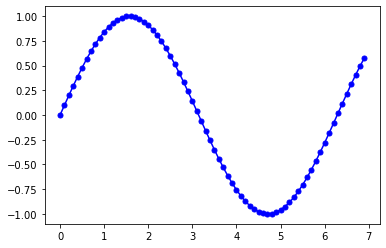

In [84]:
x = np.arange(0,7,0.1)
y = np.sin(x)
plt.plot( x , y , marker = 'o' , c = 'b' , markersize =5)

*check out markers and colors table:*   https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html

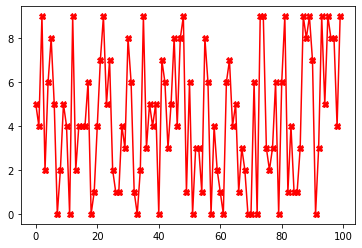

In [32]:
shahradri_goals_time_serires = results[0][0]
plt.plot( shahradri_goals_time_serires , marker = 'X', c = 'r')

***
### plt.scatter
    Finding Correlations, Scattering of the Data, ...

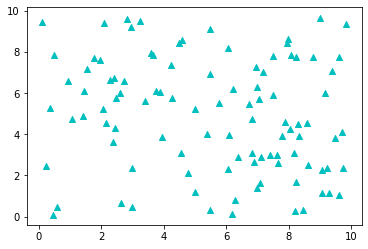

In [33]:
x_random = np.random.uniform(0,10,size = 100)
y_random = np.random.uniform(0,10,size = 100)

plt.scatter(x_random,y_random, c = 'c', marker = '^')

- **Example:**

    *Ball Possession* and *Pass accuracy* relation

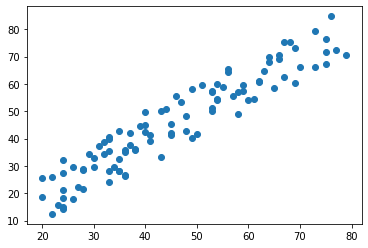

In [34]:
plt.scatter(results[1][0],results[2][0])

***
### plt.hist
    Data distribution

(array([ 8.,  7., 19., 41., 68., 51., 51., 32., 16.,  7.]),
 array([-2.7891746 , -2.26030223, -1.73142987, -1.2025575 , -0.67368514,
        -0.14481277,  0.38405959,  0.91293196,  1.44180432,  1.97067669,
         2.49954905]),
 <a list of 10 Patch objects>)

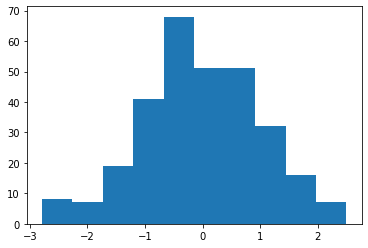

In [90]:
x_normal = np.random.normal(size = 300)

plt.hist(x_normal)

(array([11., 10., 18., 10., 10., 10.,  9., 10.,  6.,  6.]),
 array([20. , 25.9, 31.8, 37.7, 43.6, 49.5, 55.4, 61.3, 67.2, 73.1, 79. ]),
 <a list of 10 Patch objects>)

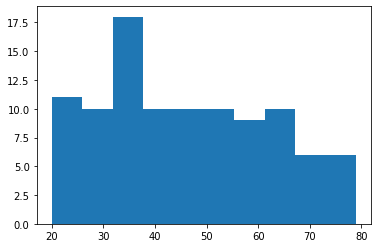

In [91]:
plt.hist(results[1][0])

***
## Controling the figure

### Multi-plots

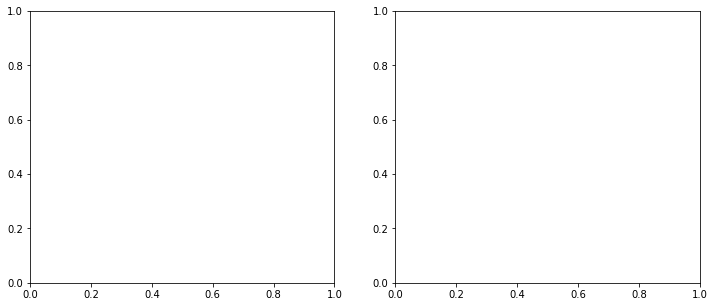

In [97]:
fig = plt.figure(figsize= [12,5])
ax1,ax2 = fig.subplots(nrows = 1,ncols = 2)

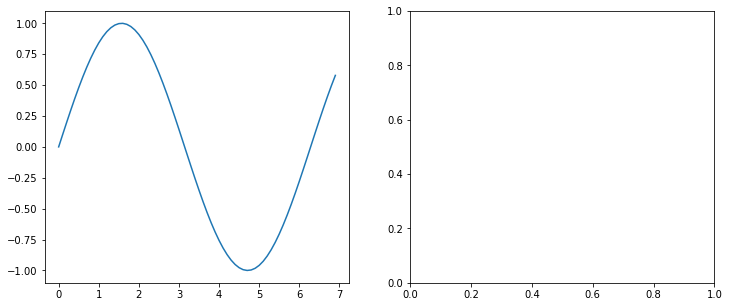

In [98]:
ax1.plot(x,y)
fig

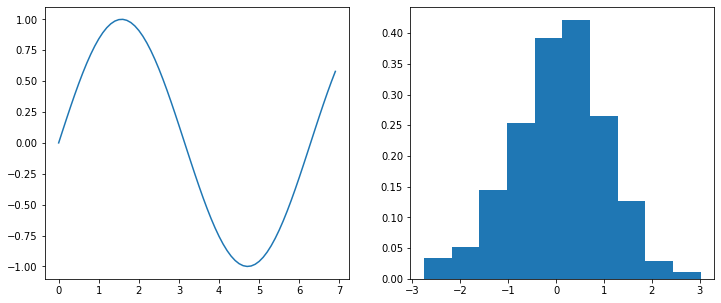

In [39]:
ax2.hist(x_normal , density= True)
fig

In [40]:
x_range = np.arange(-5,+5,0.05)
ax2.plot( x_range, np.exp( -(x_range)**2 ) / np.sqrt( np.pi ) , linestyle = '--')

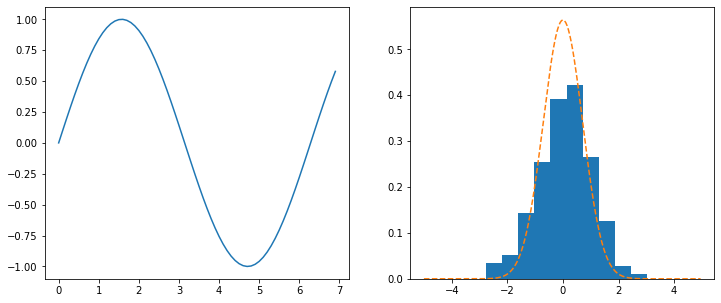

In [41]:
fig

### Annotations

In [42]:
ax1.set_title('Periodic function')
ax1.set_xlabel('Real axis')
ax1.set_ylabel('Sin(x)')


ax2.set_title('Normal distribution')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')

Text(383.1863636363635, 0.5, 'Density')

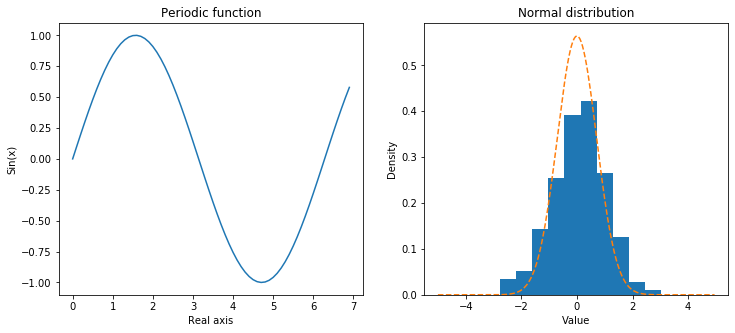

In [43]:
fig

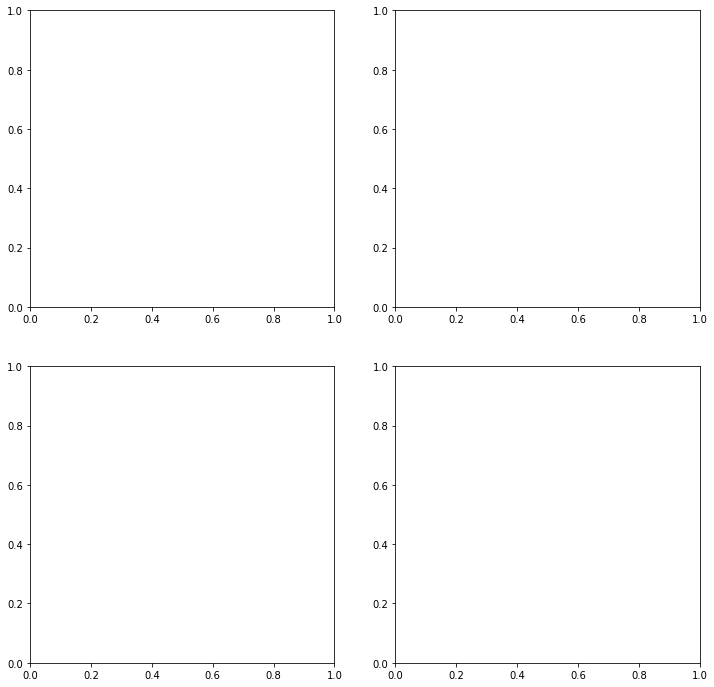

In [109]:
fig_new = plt.figure(figsize = [12,12])
ax_array = fig_new.subplots(nrows = 2, ncols = 2)

In [110]:
ax_array[0][1].plot(x,y)

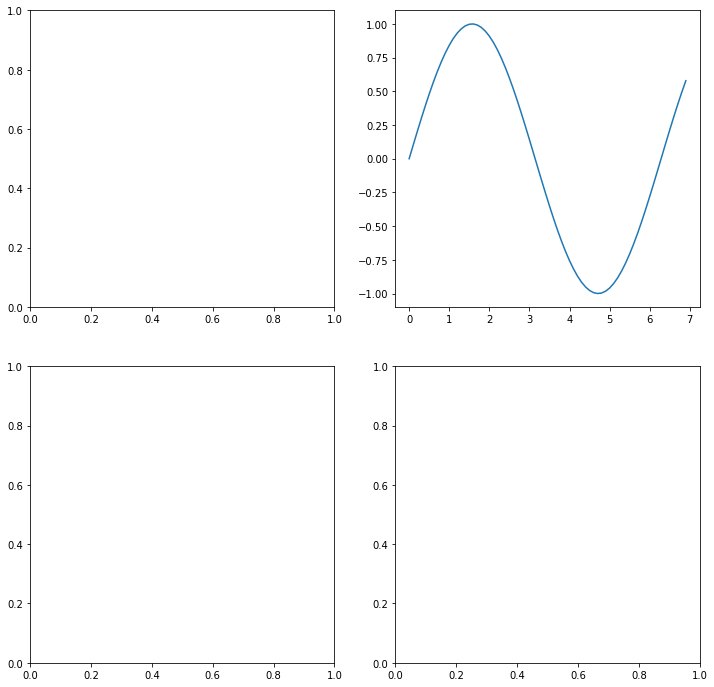

In [111]:
fig_new

In [114]:
ax_array[0][1].clear()

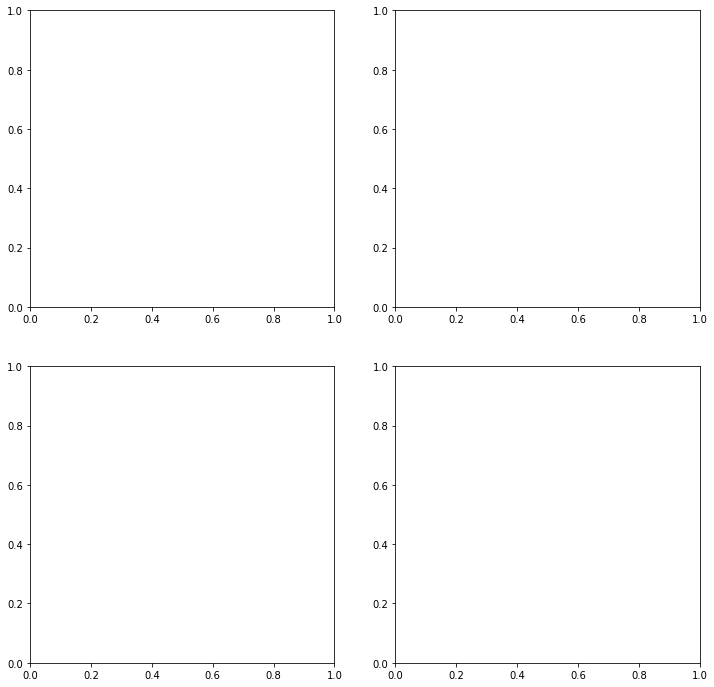

In [115]:
fig_new

***
## Checkout matplotlib gallary:    https://matplotlib.org/3.1.1/gallery/index.html

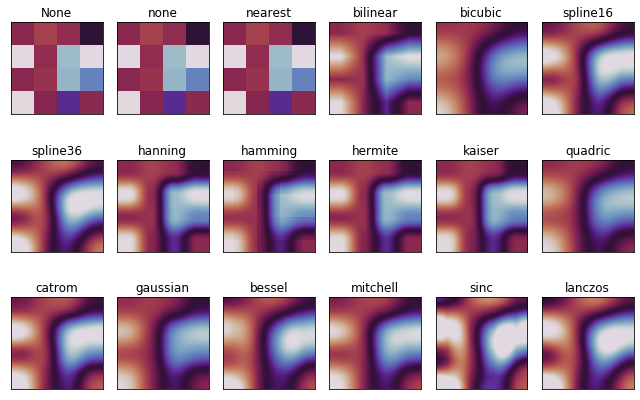

In [119]:
import matplotlib.pyplot as plt
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='twilight')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()


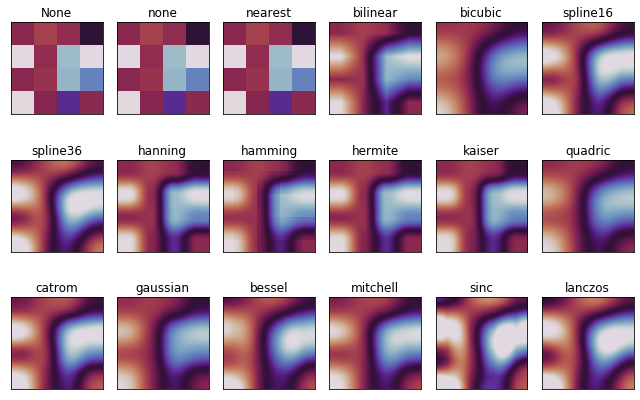

In [120]:
fig

In [122]:
# fig.savefig('imshow_example.png',dpi = 800)

In [123]:
grid

array([[0.7003673 , 0.74275081, 0.70928001, 0.56674552],
       [0.97778533, 0.70633485, 0.24791576, 0.15788335],
       [0.69769852, 0.71995667, 0.25774443, 0.34154678],
       [0.96876117, 0.6945071 , 0.46638326, 0.7028127 ]])